In [225]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp


In [232]:
#Params: 
r = 27.0000000001
sig = 8
beta = 3.6 

### The equations 

$\frac{dx}{dt}= \sigma(y-x),$ \
$\frac{dy}{dt}= x(r-z)-y,$ \
$\frac{dz}{dt}= xy- \beta z ,$

The Jacobian can be easily derived: 
$
J = 
\begin{pmatrix}
-\sigma & \sigma & 0  \\
r-z & -1 & -x  \\
y  & x  & -\beta   
\end{pmatrix}
$

In [233]:
def f(t,q):
    return np.array([
        sig*(q[1]-q[0]),
        q[0]*(r-q[2])-q[1],
        q[0]*q[1]-beta*q[2]
    ])

In [234]:
#inital conditions: 
q0 = [int(1),int(1),int(1)]
tspan = (0,400) 
sol1 = solve_ivp(f, tspan, q0, method='RK45', t_eval=np.linspace(0, 100, 40000))

In [248]:
r = 27
sig = 14
beta = 8/3

In [249]:
#inital conditions: 
q0 = [int(1),int(1),int(1)]
tspan = (0,1000) 
sol2 = solve_ivp(f, tspan, q0, method='RK45', t_eval=np.linspace(0, 100, 40000))

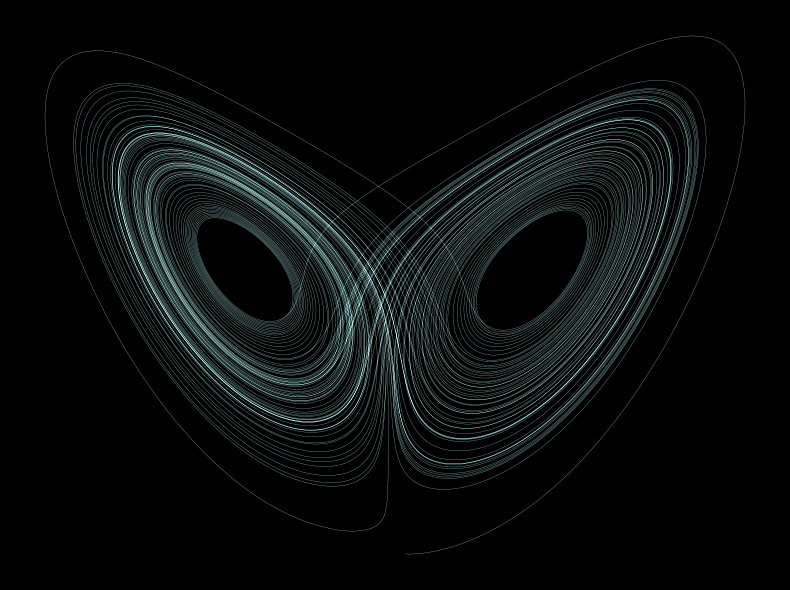

In [251]:
#x1, y1, z1 = sol1.y
x2 , y2, z2 = sol2.y
plt.style.use('dark_background')
fig = plt.subplots(figsize=(8,6))
plt.plot(x2, z2, lw=0.18, color='paleturquoise')
#plt.plot(x1, z1, lw=0.18, color='cyan')
#ax.set_title("Lorenz Attractor (RK4 Integration)")
#ax.set_xlabel("X")
#ax.set_ylabel("Y")
#ax.set_zlabel("Z")
plt.axis('off')
plt.tight_layout()
plt.savefig("lorenz_dark3.png", dpi=200, bbox_inches='tight', pad_inches=0)
plt.show()